<a href="https://colab.research.google.com/github/perses08/IMDB_classification-nlp-/blob/main/imdb_multi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k',with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5JKXCK/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5JKXCK/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5JKXCK/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train, test = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
train_dataset = train.shuffle(10000)
train_dataset = train_dataset.padded_batch(64,tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test.padded_batch(64,tf.compat.v1.data.get_output_shapes(test))

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size,64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64,activation="relu"),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset,verbose=2)

Epoch 1/10
391/391 - 306s - loss: 0.5899 - accuracy: 0.6808 - val_loss: 0.6915 - val_accuracy: 0.5024
Epoch 2/10
391/391 - 299s - loss: 0.5571 - accuracy: 0.7242 - val_loss: 0.5521 - val_accuracy: 0.7396
Epoch 3/10
391/391 - 301s - loss: 0.5174 - accuracy: 0.7453 - val_loss: 0.6537 - val_accuracy: 0.6100
Epoch 4/10
391/391 - 301s - loss: 0.5331 - accuracy: 0.7478 - val_loss: 0.5519 - val_accuracy: 0.7388
Epoch 5/10
391/391 - 300s - loss: 0.4816 - accuracy: 0.7806 - val_loss: 0.5781 - val_accuracy: 0.7002
Epoch 6/10
391/391 - 301s - loss: 0.3753 - accuracy: 0.8435 - val_loss: 0.5098 - val_accuracy: 0.7814
Epoch 7/10
391/391 - 300s - loss: 0.3213 - accuracy: 0.8714 - val_loss: 0.4719 - val_accuracy: 0.7987
Epoch 8/10
391/391 - 301s - loss: 0.2844 - accuracy: 0.8899 - val_loss: 0.4907 - val_accuracy: 0.8016
Epoch 9/10
391/391 - 299s - loss: 0.2307 - accuracy: 0.9150 - val_loss: 0.4569 - val_accuracy: 0.8220
Epoch 10/10


In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

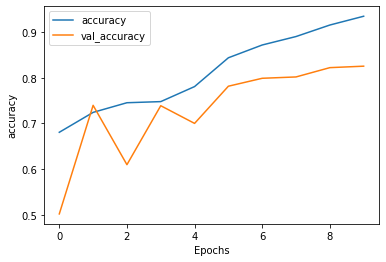

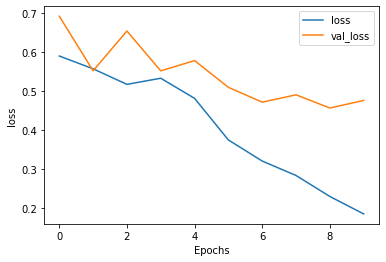

In [12]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')